In [1]:
import math

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.size": 14})

A **European option** is a contract between two parties in which:

- the seller of the option, known as the writer,
- grants the buyer of the option, known as the holder,
- the **right to purchase (= call option) from the writer** or **to sell (= put option)** to him an underlying (with a current spot price S(t))
- for a **prescribed price K**, called the exercise or strike price
- at the **expiry date T** in the future.

### Plain vanilla option pricing 

Qui sono riportati i risultati di simulazioni per il calcolo dei prezzi di opzioni finanziarie usando la soluzione analitica del moto browniano geometrico $GBM(r,\sigma^2)$.

Le simulazioni sono state eseguite in due modi diversi: campionando direttamente al tempo $T$, e usando $S(t)$ per portarci con tanti piccoli passi dal tempo attuale $t=0$ al tempo $T$. Entrambi risultati convergono bene al risultato ottenuto con l'equazione di Black-Scholes. 

$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$


$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    

- Asset price at contract time (spot price): $S(0) = 100$
- Delivery time: $T=1$
- Strike price: $K = 100$
- risk-free interest rate: $0.1$
- volatility: $\sigma = 0.25$

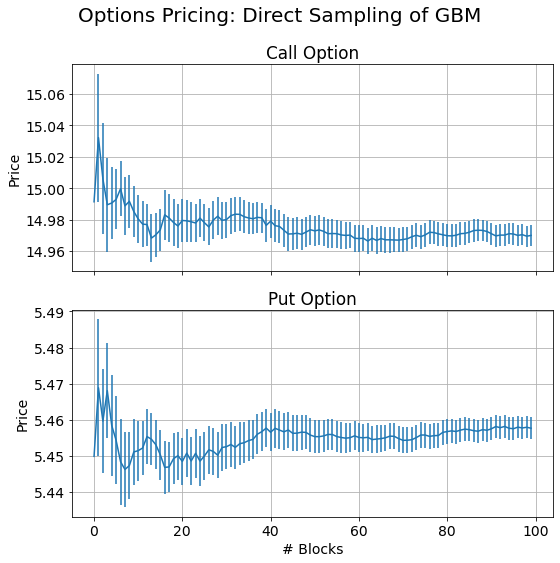

In [2]:
call, call_err = np.loadtxt("./data/direct_call.dat", usecols=(0, 2), delimiter=" ", unpack="true")
put, put_err = np.loadtxt("./data/direct_put.dat", usecols=(0, 2), delimiter=" ", unpack="true")

N = 100

fig, ax = plt.subplots(2, figsize=(8, 8), sharex=True)
fig.suptitle("Options Pricing: Direct Sampling of GBM", fontsize=20)

x = np.arange(N)

ax[0].errorbar(x, call, yerr=call_err)
ax[0].grid(True)
ax[0].title.set_text("Call Option")
ax[0].set_ylabel("Price")

ax[1].errorbar(x, put, yerr=put_err)
ax[1].title.set_text("Put Option")
ax[1].set_xlabel("# Blocks")
ax[1].set_ylabel("Price")
ax[1].grid(True)

plt.tight_layout()
plt.show()

**Figure: Blocked averages for GMB estimates of call and put options using direct sampling.**

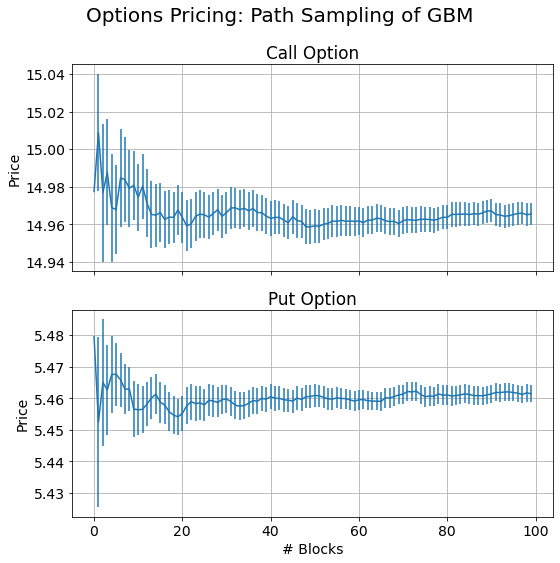

In [3]:
datafile = "./data/path_call.dat"
call, call_err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

datafile = "./data/path_put.dat"
put, put_err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

N = 100

fig, ax = plt.subplots(2, figsize=(8, 8), sharex=True)
fig.suptitle("Options Pricing: Path Sampling of GBM", fontsize=20)

x = np.arange(N)

ax[0].errorbar(x, call, yerr=call_err)
ax[0].grid(True)
ax[0].title.set_text("Call Option")
ax[0].set_ylabel("Price")

ax[1].errorbar(x, put, yerr=put_err)
ax[1].title.set_text("Put Option")
ax[1].set_xlabel("# Blocks")
ax[1].set_ylabel("Price")
ax[1].grid(True)

plt.tight_layout()
plt.show()

**Figure: Blocked averages for GMB estimates of call and put options using "path" sampling.**